Overview
1) Understanding the shape of the data
2) Data cleaning
3) Feature Engineering
4) Data Analysis
5) Results

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn import svm

%matplotlib inline

In [80]:
#reading the dataset
dataset = pd.read_csv("heart_failure_clinical_records_dataset.csv")
dataset.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [81]:
#shape of the dataset
dataset.shape
# dataset.age.value_counts()

(299, 13)

In [82]:
dataset.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [83]:
#quick look at the data to find the null values
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [84]:
#to understand the numeric data we use describe() method
dataset.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [85]:
#count of the column
dataset.high_blood_pressure.value_counts()

0    194
1    105
Name: high_blood_pressure, dtype: int64

In [86]:
dataset_numerical = dataset[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
                              'ejection_fraction', 'high_blood_pressure', 'platelets',
                             'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
                             ]]


### Exploratory Data Analysis

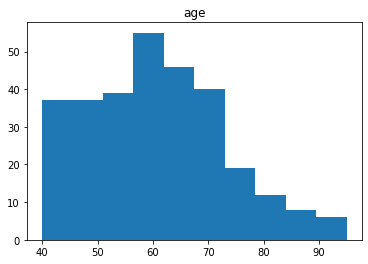

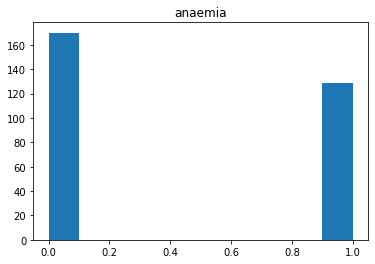

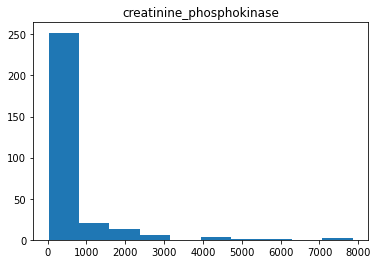

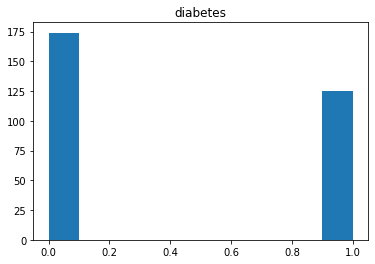

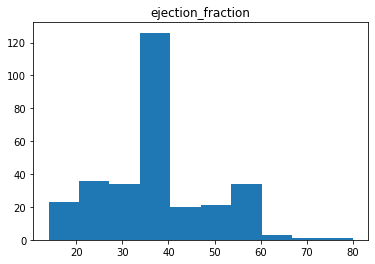

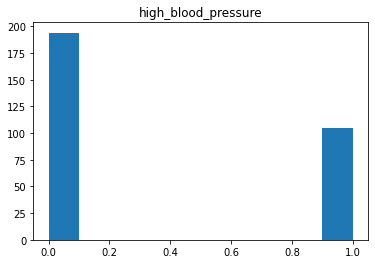

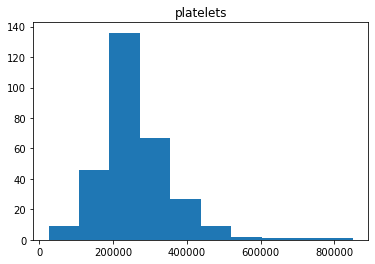

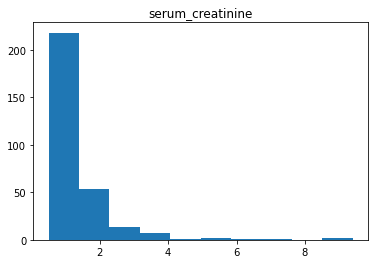

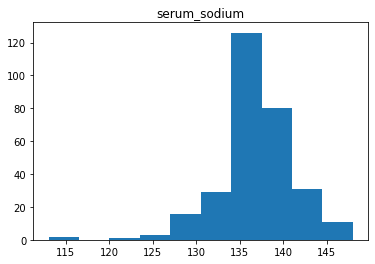

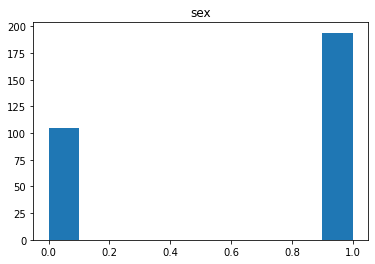

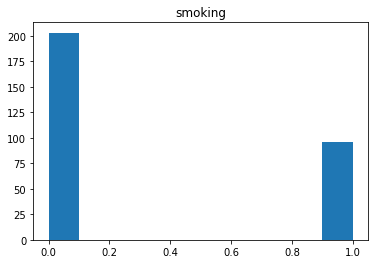

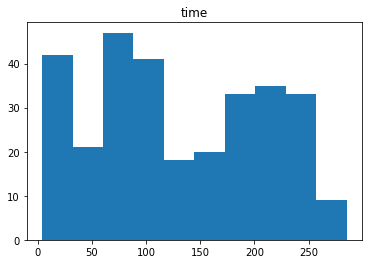

In [87]:
#plot the distributions of various columns
for i in dataset_numerical:
    plt.hist(dataset_numerical[i])
    plt.title(i)
    plt.show()

In [88]:
#we can find the correlation between each feature using the corr() method
print(dataset_numerical.corr())

                               age   anaemia  creatinine_phosphokinase  \
age                       1.000000  0.088006                 -0.081584   
anaemia                   0.088006  1.000000                 -0.190741   
creatinine_phosphokinase -0.081584 -0.190741                  1.000000   
diabetes                 -0.101012 -0.012729                 -0.009639   
ejection_fraction         0.060098  0.031557                 -0.044080   
high_blood_pressure       0.093289  0.038182                 -0.070590   
platelets                -0.052354 -0.043786                  0.024463   
serum_creatinine          0.159187  0.052174                 -0.016408   
serum_sodium             -0.045966  0.041882                  0.059550   
sex                       0.065430 -0.094769                  0.079791   
smoking                   0.018668 -0.107290                  0.002421   
time                     -0.224068 -0.141414                 -0.009346   

                          diabetes  e

In [89]:
dataset.sex.value_counts()

1    194
0    105
Name: sex, dtype: int64

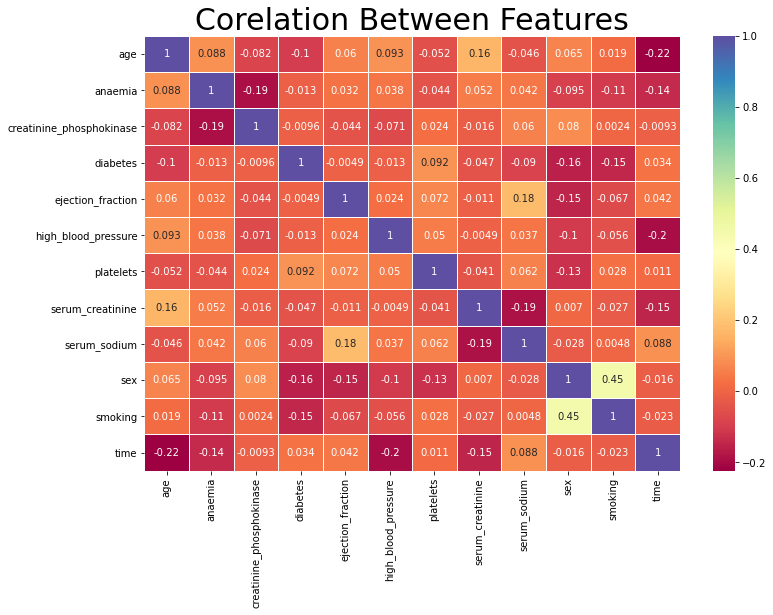

In [151]:
#plotting the correlation for a better understanding
plt.figure(figsize=(12,8))
sns.heatmap(dataset_numerical.corr(), cmap="Spectral", annot=True, linewidths=0.5)
plt.title('Corelation Between Features', fontsize=30)
plt.show()
#correlation less

# Outlier Detection
- An Outlier is a datapoint which significatly differs from other observations

![outlier.jpg](assets/outlier.jpg)
- image source: https://dataschool.com/fundamentals-of-analysis/what-is-an-outlier/
- An outlier can casue serious problems in predictions
There are many ways to detect outliers, here i have used IOR interquartile range to detect outliers 

### Box Plot

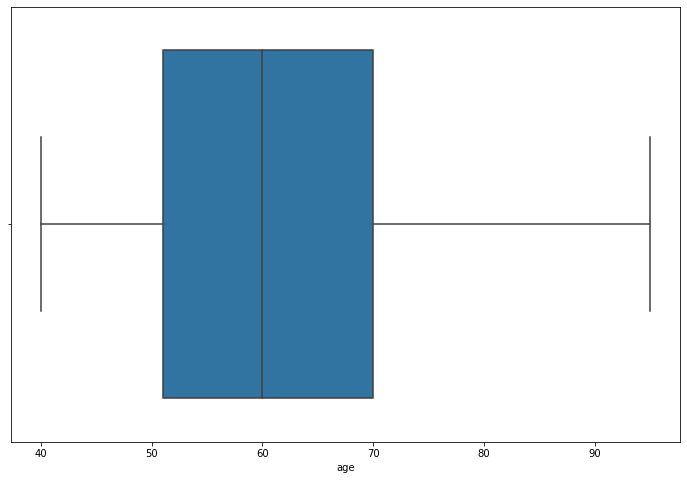

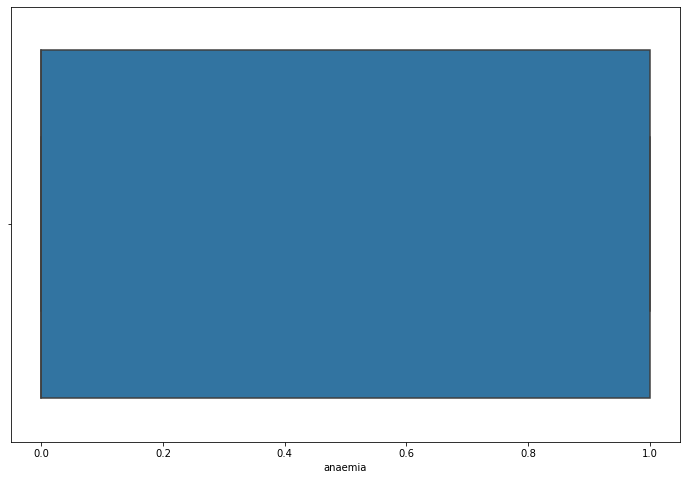

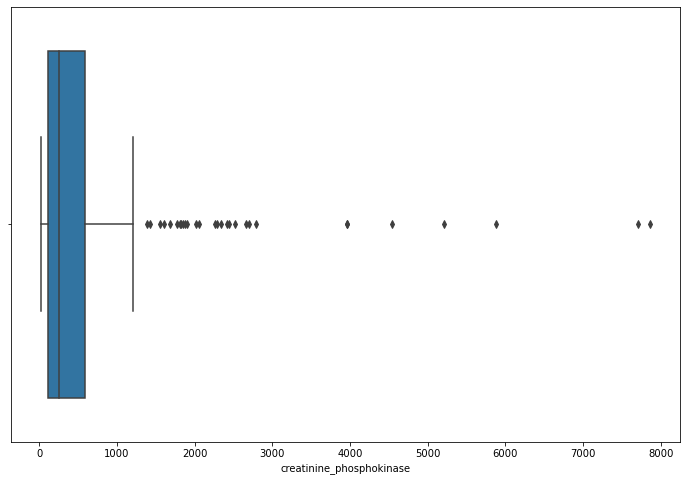

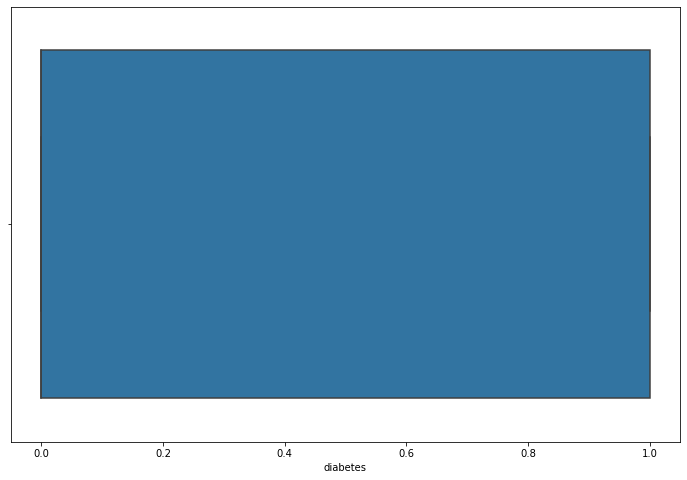

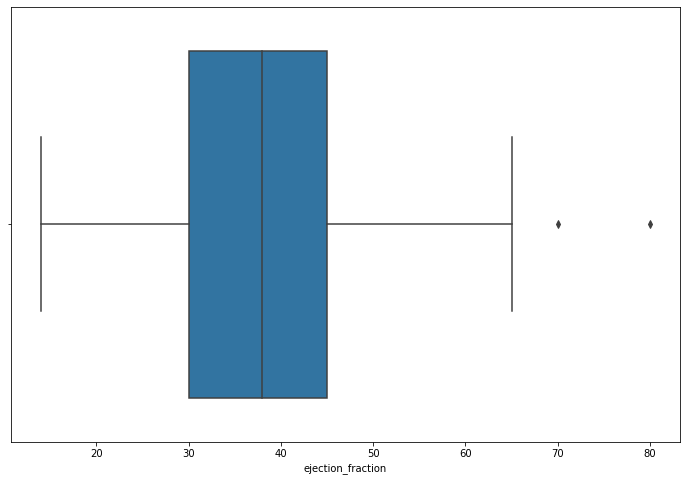

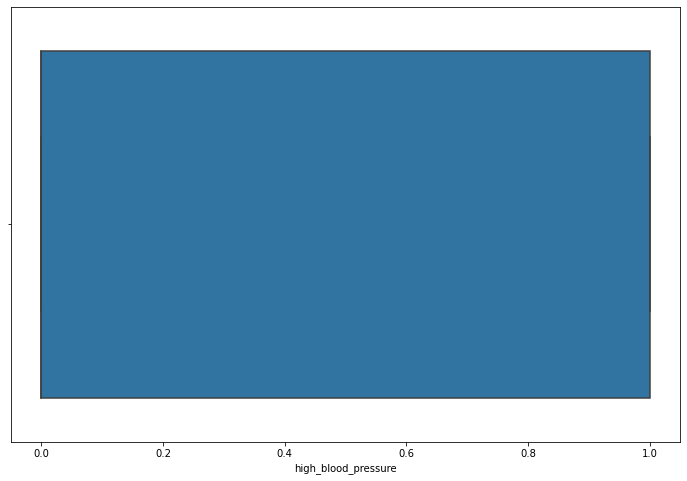

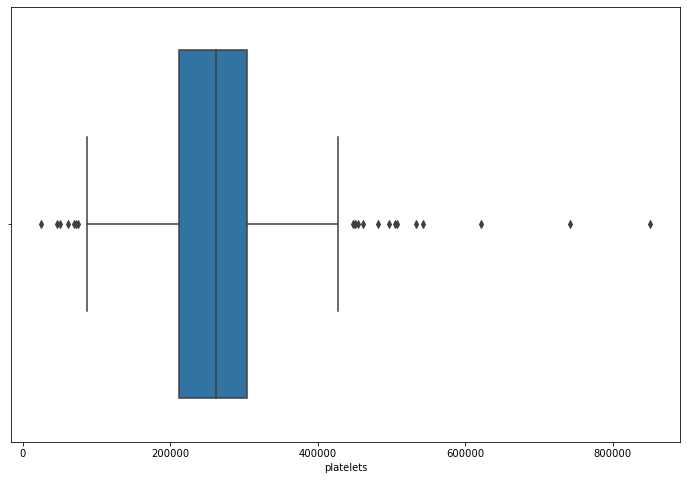

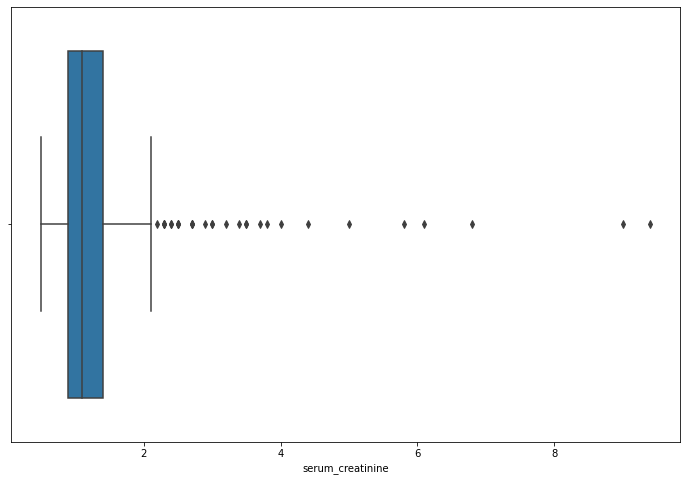

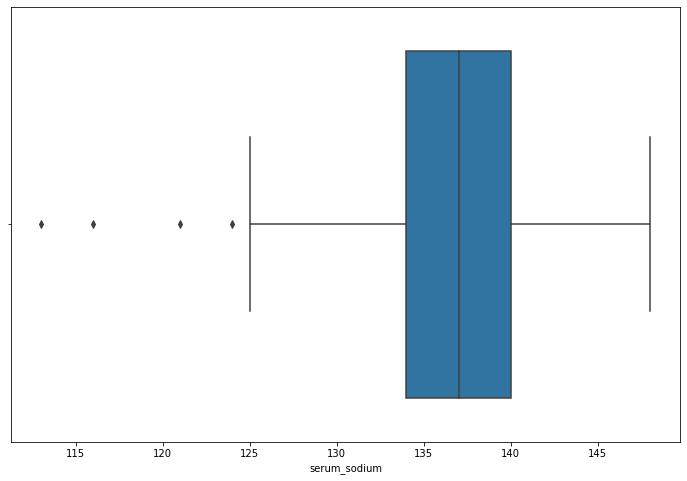

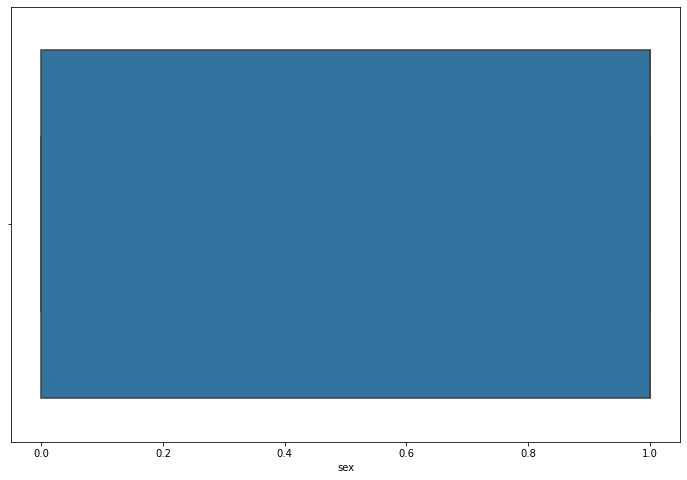

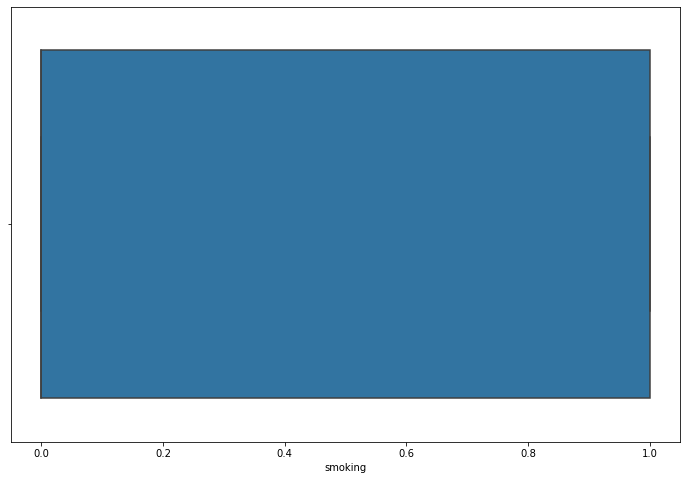

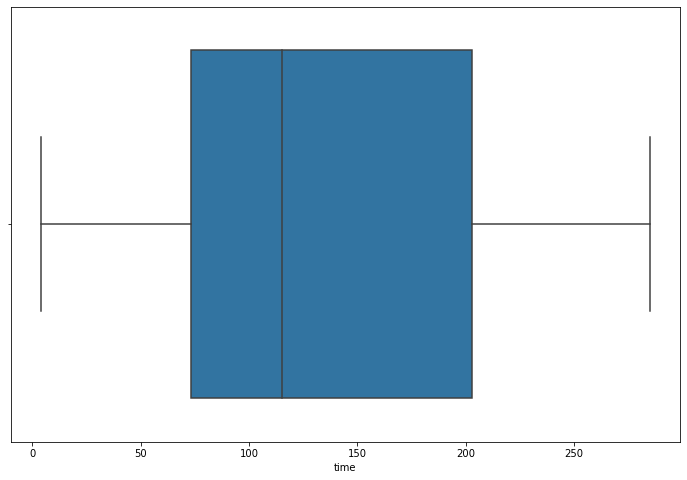

In [91]:
for i in dataset_numerical:
    plt.figure(figsize=(12,8))
    sns.boxplot(x=dataset_numerical[i])
    plt.show()


# Outlier Removal
- reference: https://medium.com/analytics-vidhya/how-to-remove-outliers-for-machine-learning-24620c4657e8

In [92]:
def outliers(dataset_out,drop=False):
    for each_feature in dataset_out.columns:
        feature_data=dataset_out[each_feature]
        Q1=np.percentile(feature_data,25.)
        Q3=np.percentile(feature_data,75.)
        IQR=Q3-Q1
        outlier_step=IQR*1.5
        outliers=feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()
        if not drop:
            print(f"For the feature {each_feature}, No of outliers {len(outliers)}")
        else:
            dataset.drop(outliers,inplace=True,errors='ignore')

outliers(dataset[['creatinine_phosphokinase',
         'ejection_fraction', 'platelets', 'serum_sodium','serum_creatinine']])

For the feature creatinine_phosphokinase, No of outliers 29
For the feature ejection_fraction, No of outliers 2
For the feature platelets, No of outliers 21
For the feature serum_sodium, No of outliers 4
For the feature serum_creatinine, No of outliers 29


Here as we can see are losing a lot of data. Instead of eliminating all extreme values we can transform the variables. Natural log can help solve this issue.

In [93]:
outline_free_df=dataset.copy()
outline_free_df[['creatinine_phosphokinase','ejection_fraction', 'platelets', 'serum_sodium','serum_creatinine']]=np.log(outline_free_df[['creatinine_phosphokinase',
         'ejection_fraction', 'platelets', 'serum_sodium','serum_creatinine']])
outliers(outline_free_df[['creatinine_phosphokinase',
         'ejection_fraction', 'platelets', 'serum_sodium','serum_creatinine']]) 

For the feature creatinine_phosphokinase, No of outliers 2
For the feature ejection_fraction, No of outliers 3
For the feature platelets, No of outliers 16
For the feature serum_sodium, No of outliers 5
For the feature serum_creatinine, No of outliers 17


In [94]:
#Now we can drop this rows
outliers(outline_free_df[['creatinine_phosphokinase',
         'ejection_fraction', 'platelets', 'serum_sodium','serum_creatinine']],drop=True)

In [95]:
dataset.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000
mean,60.733853,0.437984,523.186047,0.406977,38.310078,0.372093,263906.498682,1.171202,137.096899,0.655039,0.329457,133.558140,0.279070
std,11.839712,0.497103,770.259073,0.492225,11.441136,0.484302,73866.659002,0.404008,3.627917,0.476280,0.470930,75.870708,0.449414
min,40.000000,0.000000,30.000000,0.000000,17.000000,0.000000,126000.000000,0.500000,126.000000,0.000000,0.000000,4.000000,0.000000
25%,51.000000,0.000000,115.750000,0.000000,30.000000,0.000000,219250.000000,0.900000,135.000000,0.000000,0.000000,77.250000,0.000000
50%,60.000000,0.000000,238.500000,0.000000,38.000000,0.000000,263358.030000,1.100000,137.000000,1.000000,0.000000,119.500000,0.000000
75%,69.750000,1.000000,582.000000,1.000000,45.000000,1.000000,302000.000000,1.300000,140.000000,1.000000,1.000000,205.000000,1.000000
max,95.000000,1.000000,5882.000000,1.000000,80.000000,1.000000,504000.000000,2.700000,148.000000,1.000000,1.000000,285.000000,1.000000


# Normalizing the data

In [96]:

normalized_data=dataset.copy()
normalized_data=(normalized_data-normalized_data.min())/(normalized_data.max()-normalized_data.min())
normalized_data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0.636364,0.0,0.094327,0.0,0.047619,1.0,0.367725,0.636364,0.181818,1.0,0.0,0.000000,1.0
2,0.454545,0.0,0.019822,0.0,0.047619,0.0,0.095238,0.363636,0.136364,1.0,1.0,0.010676,1.0
3,0.181818,1.0,0.013841,0.0,0.047619,0.0,0.222222,0.636364,0.500000,1.0,0.0,0.010676,1.0
5,0.909091,1.0,0.002905,0.0,0.365079,1.0,0.206349,0.727273,0.272727,1.0,1.0,0.014235,1.0
7,0.363636,1.0,0.048701,1.0,0.682540,0.0,0.867725,0.272727,0.227273,1.0,1.0,0.021352,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,0.418182,1.0,0.012474,1.0,0.285714,0.0,0.140212,0.181818,0.454545,1.0,1.0,0.946619,0.0
294,0.400000,0.0,0.005297,1.0,0.333333,1.0,0.076720,0.272727,0.772727,1.0,1.0,0.946619,0.0
295,0.272727,0.0,0.305878,0.0,0.333333,0.0,0.380952,0.318182,0.590909,0.0,0.0,0.950178,0.0
297,0.090909,0.0,0.407211,0.0,0.333333,0.0,0.037037,0.409091,0.636364,1.0,1.0,0.982206,0.0


# Let's do some Machine Learning!

In [128]:
#lets select the features which we want to feed into our model 
X = np.asarray(normalized_data[['age', 'creatinine_phosphokinase', 'diabetes',
      'ejection_fraction', 'high_blood_pressure', 'platelets',
     'serum_creatinine', 'serum_sodium', 'sex', 'smoking']])
y = normalized_data['DEATH_EVENT']


- We spilt the dataset using sklearn's train_test_split method. We reserve 80% of the dataset for training and rest 20% for testing.
- There are other better ways to split the data such as KFold,Stratified Kfold which are better than train_test_split.
- train_test_split can give a biased training and test data. This is a serious drawback.

In [98]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)
print(f"Train set:{X_train.shape},{y_train.shape}")
print(f"Test set:{X_test.shape},{y_test.shape}")

Train set:(206, 10),(206,)
Test set:(52, 10),(52,)


### GridsearchCV
- It is used to find the best hyperparameters for our model
- It is slow since it tries all the combinations to find the parameters.

In [131]:
params_for_l1={
    'C':np.logspace(0,4,10),
    'solver':['liblinear','saga']
}
params_for_l2={
    'C':np.logspace(0,4,10),
    'solver':['newton-cg','lbfgs','liblinear','sag','saga']
}

#### Logistic Regression with L1 Penalty

In [132]:
logreg_with_l1_gridcv = LogisticRegression(penalty='l1')
logreg_with_l1_gridcv = GridSearchCV(
    estimator=logreg_with_l1_gridcv, param_grid=params_for_l1, cv=10)
logreg_with_l1_gridcv.fit(X_train, y_train)
print(f"Best Hyperparameter:{logreg_with_l1_gridcv.best_params_}")

Best Hyperparameter:{'C': 166.81005372000593, 'solver': 'liblinear'}


> - C:: defines strength of regularization
> - solver:: algorrithm to use in optimaization problem
> - penalty:: used to specify the norm

In [112]:
logreg_with_l1_gridcv = LogisticRegression(C=166.81005372000593, solver='liblinear', penalty='l1')
logreg_with_l1_gridcv.fit(X_train, y_train)

LogisticRegression(C=166.81005372000593, penalty='l1', solver='liblinear')

#### Logistic Regression with L2 penalty

In [101]:
logreg_with_l2_gridcv = LogisticRegression(penalty='l2')
logreg_with_l2_gridcv = GridSearchCV(
    estimator=logreg_with_l2_gridcv, param_grid=params_for_l2, cv=10)
logreg_with_l2_gridcv.fit(X_train, y_train)
print(f"Best Hyperparameter:{logreg_with_l2_gridcv.best_params_}")

Best Hyperparameter:{'C': 59.94842503189409, 'solver': 'newton-cg'}


In [113]:
logreg_with_l2_gridcv = LogisticRegression(
    C=59.94842503189409, solver='newton-cg', penalty='l2')
logreg_with_l2_gridcv.fit(X_train, y_train)

LogisticRegression(C=59.94842503189409, solver='newton-cg')

### Evaluation of Logistic Regression with L1 penalty

#### Confusion Matrix
[correct representation of sklearn confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

![confusion_matrix_sklearn](assets/confusion_matrix_sklearn.jpg)

In [133]:
scores=cross_val_score(logreg_with_l1_gridcv,X_train,y_train,cv=10)
scores

array([0.80952381, 0.85714286, 0.71428571, 0.71428571, 0.80952381,
       0.76190476, 0.7       , 0.8       , 0.8       , 0.95      ])

In [134]:
Y_hat=logreg_with_l1_gridcv.predict(X_test)
print(classification_report(y_test,Y_hat))

              precision    recall  f1-score   support

         0.0       0.70      0.88      0.78        34
         1.0       0.56      0.28      0.37        18

    accuracy                           0.67        52
   macro avg       0.63      0.58      0.57        52
weighted avg       0.65      0.67      0.64        52



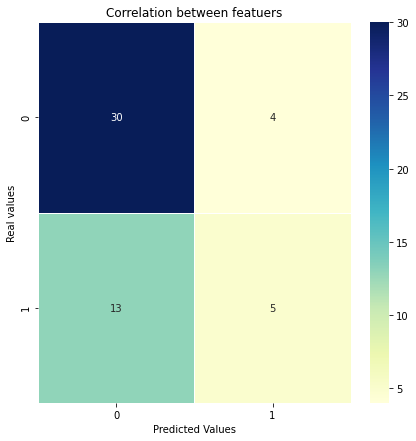

In [192]:
plt.figure(figsize=(7,7))
sns.heatmap(confusion_matrix(y_test,Y_hat),annot=True,linewidth=0.5,cmap="YlGnBu")
plt.title("Correlation between featuers")
plt.ylabel("Real values")
plt.xlabel("Predicted Values")
plt.show()

In [141]:
print(f"True Positive Cases: {confusion_matrix(y_test,Y_hat)[1][1]}")
print(f"True Negative Cases: {confusion_matrix(y_test,Y_hat)[0][0]}")
print(f"False Positive Cases: {confusion_matrix(y_test,Y_hat)[0][1]}")
print(f"False Negative Cases: {confusion_matrix(y_test,Y_hat)[1][0]}")

True Positive Cases: 5
True Negative Cases: 30
False Positive Cases: 4
False Negative Cases: 13


### Evaluation of Logistic Regression with L2 penalty

In [136]:
scores = cross_val_score(logreg_with_l2_gridcv, X_train, y_train, cv=10)
scores

array([0.80952381, 0.85714286, 0.66666667, 0.76190476, 0.80952381,
       0.76190476, 0.7       , 0.85      , 0.8       , 0.95      ])

In [137]:
Y_hat=logreg_with_l2_gridcv.predict(X_test)
print(classification_report(y_test,Y_hat))

              precision    recall  f1-score   support

         0.0       0.70      0.88      0.78        34
         1.0       0.56      0.28      0.37        18

    accuracy                           0.67        52
   macro avg       0.63      0.58      0.57        52
weighted avg       0.65      0.67      0.64        52



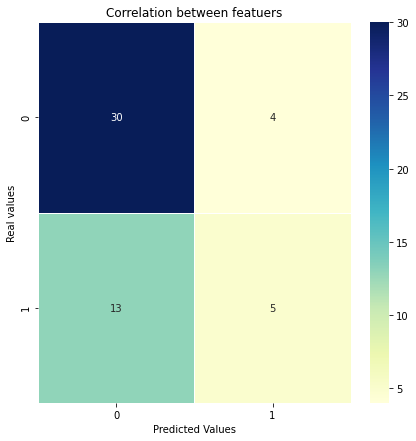

In [195]:
plt.figure(figsize=(7, 7))
sns.heatmap(confusion_matrix(y_test, Y_hat),annot=True, linewidth=0.5, cmap="YlGnBu")
plt.title("Correlation between featuers")
plt.ylabel("Real values")
plt.xlabel("Predicted Values")
plt.show()

In [140]:
print(f"True Positive Cases: {confusion_matrix(y_test,Y_hat)[1][1]}")
print(f"True Negative Cases: {confusion_matrix(y_test,Y_hat)[0][0]}")
print(f"False Positive Cases: {confusion_matrix(y_test,Y_hat)[0][1]}")
print(f"False Negative Cases: {confusion_matrix(y_test,Y_hat)[1][0]}")

True Positive Cases: 5
True Negative Cases: 30
False Positive Cases: 4
False Negative Cases: 13


### Evaluation of Suppor vector machine (SVM)

In [122]:
params_for_svm = {
    'C':np.logspace(0,4,10),
    'gamma':[1,0.1,0.01,0.001,0.0001],
    'kernel': ['linear', 'poly','rbf','sigmoid']
    }
svmreg=svm.SVC()
svmreg=GridSearchCV(estimator=svmreg,param_grid=params_for_svm,cv=10)
svmreg.fit(X_train,y_train)
print(f"Best hyperparameter: {svmreg.best_params_}")


Best hyperparameter: {'C': 59.94842503189409, 'gamma': 0.1, 'kernel': 'sigmoid'}


In [123]:
svmreg = svm.SVC(C=59.94842503189409, gamma=0.1, kernel='sigmoid')
svmreg.fit(X_train,y_train)

SVC(C=59.94842503189409, gamma=0.1, kernel='sigmoid')

In [124]:
scores=cross_val_score(svmreg,X_train,y_train)
Y_hat=svmreg.predict(X_test)    
print(classification_report(y_test,Y_hat))

              precision    recall  f1-score   support

         0.0       0.72      0.85      0.78        34
         1.0       0.58      0.39      0.47        18

    accuracy                           0.69        52
   macro avg       0.65      0.62      0.63        52
weighted avg       0.68      0.69      0.67        52



In [125]:
svmreg.score(X_test,y_test)

0.6923076923076923

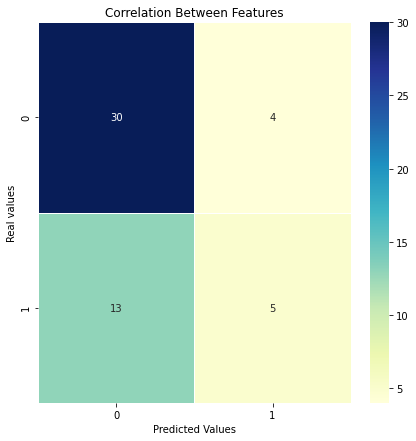

In [194]:
plt.figure(figsize=(7,7))
sns.heatmap(confusion_matrix(y_test,Y_hat),annot=True,linewidth=0.5,cmap="YlGnBu")
plt.title("Correlation Between Features")
plt.ylabel("Real values")
plt.xlabel("Predicted Values")
plt.show()

In [127]:
print(f"True Positive Cases: {confusion_matrix(y_test,Y_hat)[1][1]}")
print(f"True Negative Cases: {confusion_matrix(y_test,Y_hat)[0][0]}")
print(f"False Positive Cases: {confusion_matrix(y_test,Y_hat)[0][1]}")
print(f"False Negative Cases: {confusion_matrix(y_test,Y_hat)[1][0]}")


True Positive Cases: 7
True Negative Cases: 29
False Positive Cases: 5
False Negative Cases: 11


## Result


- I trained Support Vector Machine and Logistic Regression in which I got similar accuracies with all three of them.
- SVM gave a slightly higher accuracy of 69.23%.
- We choose Support Vector Machine as our model since it predicted lower False Negative Values and also has better accuracy compared with other models 

In [190]:
features=[0.41,0.0124,1.0,0.2857,0.0,0.1402,0.1818,0.4545,1.0,1.0]
for i in [logreg_with_l1_gridcv,logreg_with_l2_gridcv,svmreg]:
    def prediction(i,features):
        result=i.predict([features])
        print(f"DEATH_EVENT :{result}")
    prediction(i,features)         

DEATH_EVENT :[0.]
DEATH_EVENT :[0.]
DEATH_EVENT :[1.]
